Kyle Riener <br>
MSIS 2629 Individual project<br>
Revised Version

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Redesign

## Firearm deaths by country

Look at the firearm death rate of the United States compared to other developed countries around the world

In [2]:
world=pd.read_csv("World firearms murders and ownership - Sheet 1.csv")

In [3]:
world.dropna(subset=['Homicide by firearm rate per 100,000 pop'],inplace=True)

In [4]:
advanced=['Australia','Austria','Belgium','Canada','China','Denmark','England and Wales','Finland',
          'France','Ireland','Japan','Luxembourg','Netherlands','New Zealand','Sweden',
          'Switzerland','Germany','United States']

In [5]:
df=world[world['Country/Territory'].isin(advanced)]

In [6]:
df=df.sort_values('Homicide by firearm rate per 100,000 pop',ascending=False)

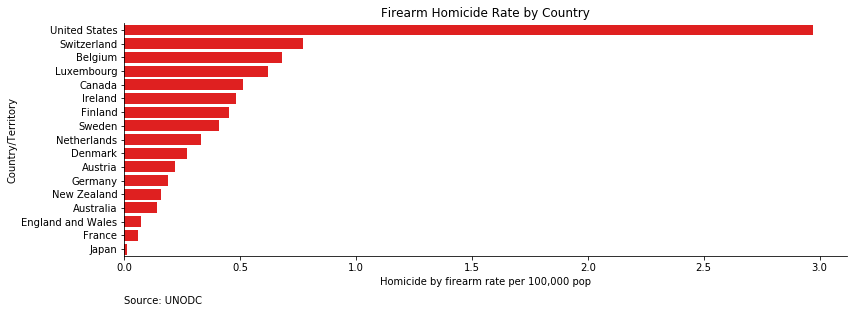

In [44]:
sns.factorplot(x='Homicide by firearm rate per 100,000 pop',y='Country/Territory',data=df,kind='bar',
             color='red',aspect=3)
plt.title("Firearm Homicide Rate by Country")
plt.text(0, 20, u'Source: UNODC', fontsize=10)

The United States has the worst firearm death rate among developed countries by far. Because we are looking at a negative topic (death rate), red is an appropriate color as it catches the reader's attention and seeing more red is a bad thing.

# Firearm death rate by state

Look at the firearm death rates and gun law grades by state

In [18]:
deaths=pd.read_csv("FIREARMS2016.csv")
gun_laws=pd.read_csv("StateGunLaws2016.csv")

In [19]:
deaths['state_abbr']=deaths['STATE']

In [20]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [21]:
deaths.STATE = deaths.state_abbr.map(states)

In [115]:
merged=gun_laws.merge(deaths,how='inner',left_on='State',right_on='STATE')

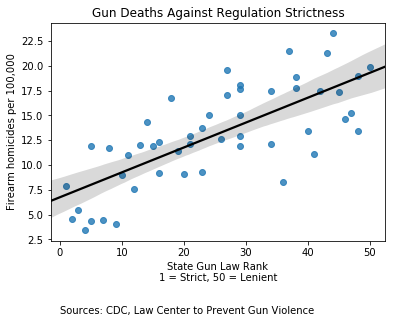

In [116]:
sns.regplot(x='Gun Law Rank', y='RATE', data=merged, line_kws={'color':'black'})
plt.title("Gun Deaths Against Regulation Strictness")
plt.xlabel("State Gun Law Rank\n1 = Strict, 50 = Lenient")
plt.ylabel("Firearm homicides per 100,000")
plt.text(0,-5, u'Sources: CDC, Law Center to Prevent Gun Violence')

Sources: CDC (https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm)<br>
Law Center to Prevent Gun Violence(http://lawcenter.giffords.org/scorecard2016/)
<br>
<br>

There is a clear trend that as gun laws get more lenient, the firearm death rate increases. The Vox article originally used a map to show this information, but the map was unnecessary. There was no regional pattern to be seen. The main point was that death rates are higher in state with poor gun regulation, which is easily seen in this graph.

# Suicide rate by state

Look at the suicide rates and gun law grades by state

In [62]:
import plotly.plotly as py
py.sign_in('kriener', '8ocyp7FxXQTYXti9bGmL')

In [106]:
suicide=pd.read_csv("SUICIDE2016.csv")

In [107]:
suicide['state_abbr']=suicide['STATE']

In [108]:
suicide.STATE = suicide.state_abbr.map(states)

In [117]:
merged=gun_laws.merge(suicide,how='inner',left_on='State',right_on='STATE')

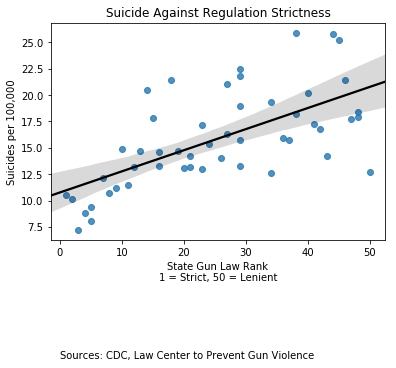

In [118]:
sns.regplot(x='Gun Law Rank', y='RATE', data=merged, line_kws={'color':'black'})
plt.title("Suicide Against Regulation Strictness")
plt.xlabel("State Gun Law Rank\n1 = Strict, 50 = Lenient")
plt.ylabel("Suicides per 100,000")
plt.text(0,-5, u'Sources: CDC, Law Center to Prevent Gun Violence')

Sources: CDC (https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm)<br>
Law Center to Prevent Gun Violence(http://lawcenter.giffords.org/scorecard2016/)

States with worse gun control laws typically have higher suicide rates. Most firearm deaths are suicides and this graph attempts to address that issue. I think the best reason to restrict gun ownership is to make it harder for people to kill themselves. This visual doesn't show what percentage of suicides use guns, but it shows a clear correlation. Stricter gun laws are needed to protect people from themselves.

# Deception

## Firearm deaths by country

In [45]:
world=pd.read_csv("World firearms murders and ownership - Sheet 1.csv")
world.dropna(subset=['Homicide by firearm rate per 100,000 pop'],inplace=True)

ghetto=['Argentina','Bahamas','Brazil','Colombia','Costa Rica','El Salvador','Honduras','Jamaica',
          'Mexico','Philippines','Puerto Rico','South Africa','United States','Venezuela']

df=world[world['Country/Territory'].isin(ghetto)]
df=df.sort_values('Homicide by firearm rate per 100,000 pop',ascending=False)

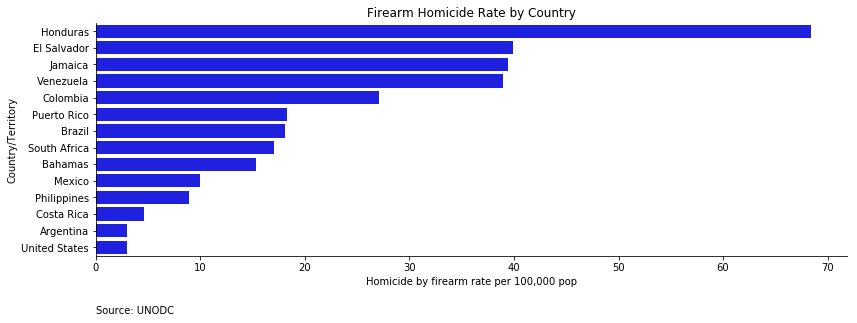

In [48]:
sns.factorplot(x='Homicide by firearm rate per 100,000 pop',y='Country/Territory',data=df,kind='bar',
             color='blue',aspect=3)
plt.title("Firearm Homicide Rate by Country")
plt.text(0, 17, u'Source: UNODC', fontsize=10)

This chart shows the U.S. has a relatively low firearm homicide rate. Even though the United States has a high death rate compared to the more advanced countries of the world, their rate doesn't seem like such a problem in this chart. The idea here is to distract the reader with the size of the bars of other countries. Even if the reader recognizes that these are mostly the more dangerous countries, the bar for the U.S. is still so small that it's hard to imagine that it's actually a serious problem.

## Redefine "Mass Shooting"

In [73]:
shootings= pd.read_csv("Mass Shootings.csv")
few_shootings=shootings[shootings["# Killed"]>6]

In [93]:
import plotly.plotly as py
py.sign_in('kriener', '8ocyp7FxXQTYXti9bGmL')

few_shootings['text'] = few_shootings['City Or County'].astype(str) + '<br>' +\
    'Deaths: '+few_shootings['# Killed'].astype(str)
    
data = [dict(
        type='scattergeo',
        lat=['26.2379', '29.2733', '36.1699', '33.0198', '31.4394'],
        lon=['-80.1248', '-98.0567', '-115.1398', '-96.6989', '-90.4577'],
        mode='markers',
        marker=dict(
            size=9
        ),
        text=few_shootings["text"],
    )
]

layout = dict(
    title = 'Mass Shootings in the U.S.',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(169, 169, 169)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    annotations=[
        dict(
            x=0.0,
            y=-0.16191064079952971,
            showarrow=False,
            text='Source: Gun Violence Archive',
            xref='paper',
            yref='paper'
        )]
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Shooting Locations')

C:\Users\Kyle\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



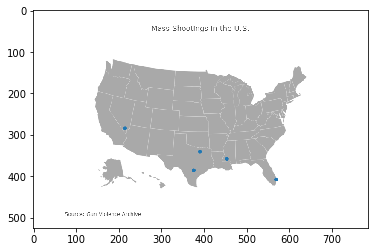

In [105]:
import matplotlib.image as mpimg
img=mpimg.imread('Shooting Locations.png')
imgplot = plt.imshow(img, aspect='auto')
plt.show()

This is a map with markers at the locations of mass shootings in the United States since 2014. For this assignment, I defined a mass shooting as an event with more than 6 deaths. Since there is no technical definition for a "mass shooting," it is up to the designer to decide the cutoff. This brought the number of mass shootings down to 5, much lower than the 1,600 in the Vox article. The idea is to create something that conveys how frequently shootings happen better than just stating a number. There isn't really a good way to do this with a graph, but I chose a map because seeing the location of a shooting can jar free some memories associated with the shooting.

Source: Gun Violence Archive
http://www.gunviolencearchive.org/mass-shooting

## Violent crime rate

In [49]:
crime_rate=pd.read_csv("Crime rate.csv")
ownership=pd.read_csv("Gun ownership.csv")
ownership.drop(ownership[ownership.State == 'Washington D.C.'].index, inplace=True)
merged=crime_rate.merge(ownership, on='State')

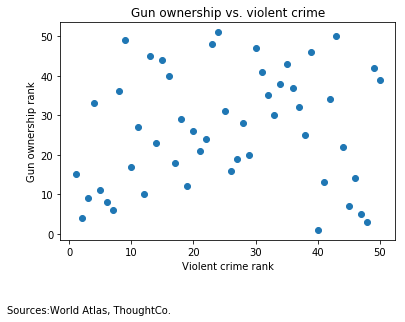

In [50]:
scatter(merged['Rank_x'],merged["Rank_y"])
plt.title("Gun ownership vs. violent crime")
plt.xlabel("Violent crime rank")
plt.ylabel("Gun ownership rank")
plt.text(-10, -20, u'Sources:World Atlas, ThoughtCo.', fontsize=10)

In [51]:
top5=list(ownership['State'].head())
bottom5=list(ownership['State'].tail())
t5=crime_rate[crime_rate['State'].isin(top5)]
b5=crime_rate[crime_rate['State'].isin(bottom5)]
top5avg=t5['Violent Crime Rate Per 100,000 Inhabitants'].mean()
bottom5avg=b5['Violent Crime Rate Per 100,000 Inhabitants'].mean()
df=pd.DataFrame({'Ownership level' : ['High Ownership','Low Ownership'],
                 'Violent Crime Rate' : [top5avg,bottom5avg]})

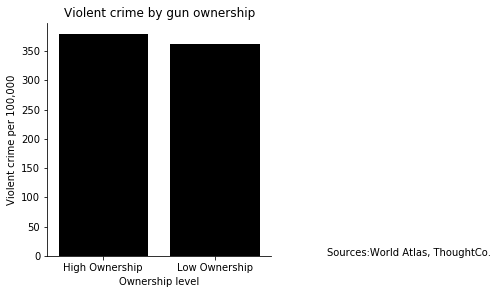

In [57]:
sns.factorplot(x='Ownership level',y='Violent Crime Rate',data=df,kind='bar', color='black')
plt.title("Violent crime by gun ownership")
plt.xlabel("Ownership level")
plt.ylabel("Violent crime per 100,000")
plt.text(2, 0, u'Sources:World Atlas, ThoughtCo.', fontsize=10)

There is no strong correlation between gun ownership and violent crime. States with a high rate of gun ownership have nearly the same rate of violent crimes as states with a low rate of gun ownership and the scatterplot shows no obvious trend. These charts can be used to make the argument that having a gun doesn't influence violent behavior. It is the violent tendencies of the people that is the problem, not guns.

Sources: World Atlas (https://www.worldatlas.com/articles/the-most-dangerous-states-in-the-u-s.html)<br>
ThoughtCo. (https://www.thoughtco.com/gun-owners-percentage-of-state-populations-3325153)